[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kjmazidi/Machine_Learning_3rd_edition/blob/master/Volume_II_Python/Part-2-ML_sklearn/5-02-Linear_regression.ipynb)

# Data cleaning
## Vehicle data

This notebook cleans a used car data set provided by [Austin Reese](https://github.com/AustinReese) 

The data was downloaded from Kaggle on 4/287/2025 from this link: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

The data set is available in the data folder, renamed as *vehicles.csv*

This notebook will do some data cleaning so that a smaller data set can be used in other notebooks. 


### Code Accompanying ***The Machine Learning Handbooks***, Volume II, Chapter 5

#### Book pdf is available on the GitHub repo: <https://github.com/kjmazidi/Machine_Learning_3rd_edition>

###### (c) 2025 KJG Mazidi, all rights reserved

In [ ]:
# imports used in this notebook

import numpy as np
import pandas as pd
import seaborn as sb

### Data description

The dataset contains a little over 425K rows and 26 columns. We will read in the colums below. Columns that are not useful for regression can be deleted later. 

* price (in US dollars)
* year
* manufacturer
* model
* condition
* cylinders
* fuel type
* odometer
* title status
* transmission
* type
* paint_color
* state

In [2]:
### load the data using pandas

df = pd.read_csv('data/vehicles.csv', usecols=['price', 'year', 'manufacturer', 'model',
                                               'condition', 'cylinders', 'fuel', 'odometer',
                                               'title_status', 'transmission', 'type', 'paint_color', 'state'])

df.shape

(426880, 13)

## Data cleaning

Since the data set is quite large, we can drop rows with missing values and still have over 130K rows, a good size data set. 


In [3]:
# delete incomplete rows

df = df.dropna()
df.shape

(130533, 13)

In [4]:
# check the data types

df.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
type             object
paint_color      object
state            object
dtype: object

The *object* data types were strings that were read in. We will convert them to categorical data. 

The price is an integer, which is good. 

The year and odometer are floats, which we will change to integer. 

In [5]:
# change select column types

df = df.astype({'year': 'int', 'odometer': 'int',
                'manufacturer': 'category', 'model': 'category', 'condition': 'category', 'cylinders': 'category',
                'fuel': 'category', 'title_status': 'category', 'transmission': 'category', 'type': 'category',
                'paint_color': 'category', 'state': 'category'
                })

df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 130533 entries, 27 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   price         130533 non-null  int64   
 1   year          130533 non-null  int64   
 2   manufacturer  130533 non-null  category
 3   model         130533 non-null  category
 4   condition     130533 non-null  category
 5   cylinders     130533 non-null  category
 6   fuel          130533 non-null  category
 7   odometer      130533 non-null  int64   
 8   title_status  130533 non-null  category
 9   transmission  130533 non-null  category
 10  type          130533 non-null  category
 11  paint_color   130533 non-null  category
 12  state         130533 non-null  category
dtypes: category(10), int64(3)
memory usage: 5.7 MB


Let's explore some of the categories to see what further modifications we want to do to the data. 

In [6]:
# explore manufacturer

df['manufacturer'].value_counts()


manufacturer
ford               22560
chevrolet          19696
toyota             11311
honda               7347
nissan              6723
gmc                 6108
jeep                5936
ram                 5052
dodge               4630
bmw                 3638
mercedes-benz       3445
subaru              2907
hyundai             2794
volkswagen          2735
lexus               2593
kia                 2194
chrysler            2184
audi                2167
cadillac            1986
infiniti            1962
acura               1930
buick               1808
mazda               1445
lincoln             1419
pontiac              960
mitsubishi           915
volvo                873
mini                 555
mercury              520
rover                449
saturn               445
jaguar               443
porsche              432
fiat                 179
tesla                 47
alfa-romeo            46
harley-davidson       36
ferrari               26
datsun                24
land rover  

We see that there are more rare car manufacturers such as aston-martin, with only 5 observations in the data.

The problem with having only a few observations in a category is that it makes it hard for the algorithm to learn about that category. We will restrict the categories to only those with over 1000 observations. 

In [7]:
manufacturer_list = df['manufacturer'].value_counts()
keepers = [x for x in manufacturer_list.keys() if manufacturer_list[x] > 1000]
keepers

['ford',
 'chevrolet',
 'toyota',
 'honda',
 'nissan',
 'gmc',
 'jeep',
 'ram',
 'dodge',
 'bmw',
 'mercedes-benz',
 'subaru',
 'hyundai',
 'volkswagen',
 'lexus',
 'kia',
 'chrysler',
 'audi',
 'cadillac',
 'infiniti',
 'acura',
 'buick',
 'mazda',
 'lincoln']

In [8]:
# subset df to keepers

df = df.loc[df['manufacturer'].isin(keepers)]
df.shape

(124570, 13)

In [9]:
# explore condition
# just 6 categories

df['condition'].value_counts()


condition
good         55105
excellent    52205
like new     12706
fair          3620
new            623
salvage        311
Name: count, dtype: int64

In [10]:
# explore title_status

df['title_status'].value_counts()

title_status
clean         118378
rebuilt         3605
salvage         1471
lien             868
missing          191
parts only        57
Name: count, dtype: int64

In [11]:
# explore paint_color

df['paint_color'].value_counts()

paint_color
white     31217
black     24608
silver    18265
red       13212
blue      13126
grey      12700
brown      3611
green      3438
custom     2497
yellow      910
orange      649
purple      337
Name: count, dtype: int64

Based on the counts above, we could limit paint color to the top 6 colors, and change the rest to 'other'. 
We will leave in the column and decide this later. 

In [12]:
# explore type

df['type'].value_counts()

type
sedan          32087
SUV            28391
pickup         17286
truck          15821
coupe           8269
other           5634
hatchback       4131
van             3653
convertible     2977
wagon           2850
mini-van        2819
offroad          471
bus              181
Name: count, dtype: int64

Based on these value counts, we will limit the vehicle type to sedan, SUV, pickup, and truck. 

In [13]:
# subset the data to just clean titles, then delete title_status

keepers = ['sedan', 'SUV', 'pickup', 'truck']

df = df.loc[df['type'].isin(keepers)]
df.shape

(93585, 13)

In [14]:
# subset the data to just clean titles, then delete title_status

df = df.loc[df['title_status'] == 'clean']
df = df.drop('title_status', axis=1)  # 1 for col, 0 for row
df.shape

(88834, 12)

### Data Exploration

Let's visualize the data. 

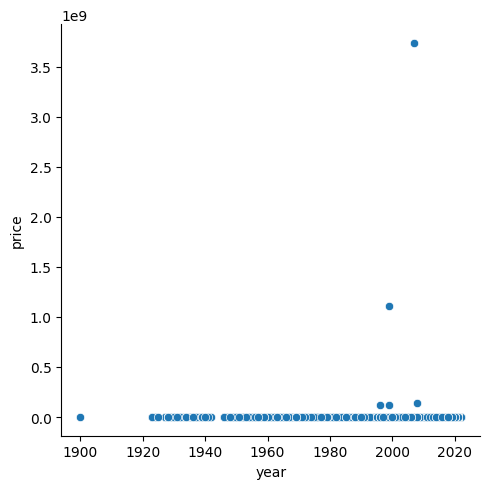

In [16]:
sb.relplot(x='year', y='price', data=df)

Well, that's ugly. Let's see what is going on.

In [17]:
print("min and max", min(df.price), max(df.price))

Q1 = df.price.quantile(0.25)
Q2 = df.price.quantile(0.5)
Q3 = df.price.quantile(0.75)
print(Q1, Q2, Q3)


min and max 0 3736928711
5995.0 11995.0 24990.0


This is why we do data exploration. There are car prices of 0 and as high as 37 billion???

Looking at the data, the 37B was for a 2007 Toyota Tundra with 164K miles. Either the owner really loves that car or this is a data entry problem. 

We will subset the data down to reasonable prices. 

In [18]:
# subset the data to the middle quartile prices

df = df.loc[df['price'] >= Q1]
df = df.loc[df['price'] <= Q3]
df.shape

(44740, 12)

With 44K dots to plot, graphs may be difficult to read. Let's sample.

In [19]:
df_sample = df.sample(n=1000)

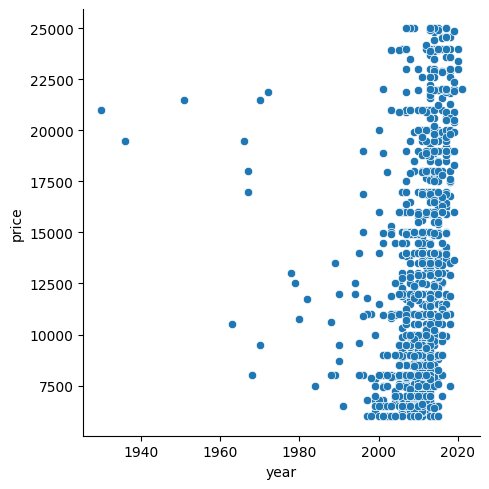

In [20]:
sb.relplot(x='year', y='price', data=df_sample)

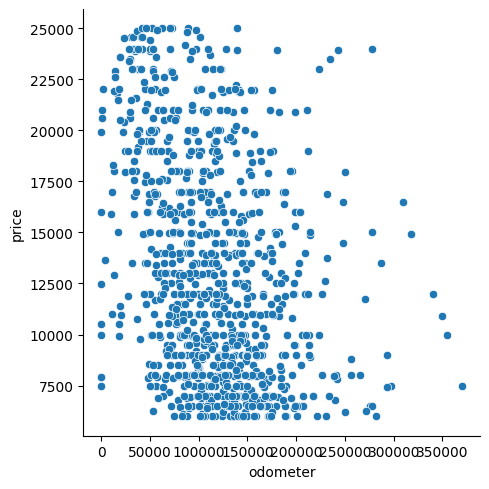

In [21]:
sb.relplot(x='odometer', y='price', data=df_sample)

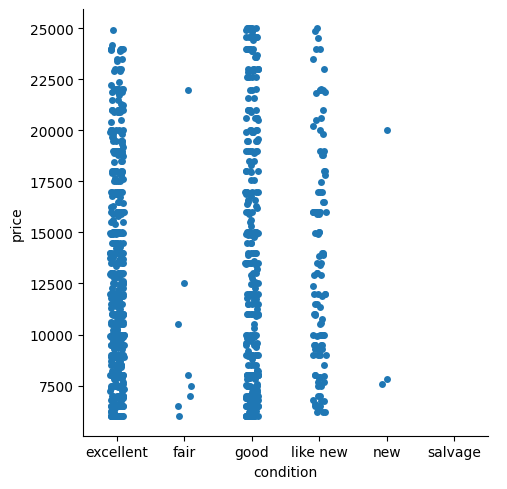

In [22]:
sb.catplot(x='condition', y='price', data=df_sample)

In [24]:
# correlation

df[['price', 'odometer', 'year']].corr()

,price,odometer,year
price,1.000000,-0.168473,0.250205
odometer,-0.168473,1.000000,-0.147275
year,0.250205,-0.147275,1.000000


Sklearn linear regression will output real numbered values, so we will convert price to a real number. 

In [39]:
df.price = df.price.astype('float')
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,state
0,22590.0,2010,5,silverado 1500,2,6,gas,71229,other,pickup,blue,al
1,15000.0,2013,8,f-150 xlt,0,5,gas,128000,automatic,truck,black,al
2,24590.0,2017,5,silverado 1500 regular,2,5,gas,40784,other,pickup,white,al
3,22590.0,2017,20,1500 regular cab tradesman,2,6,gas,39508,other,pickup,white,al
4,19900.0,2004,8,f250 super duty,2,6,diesel,88000,automatic,pickup,blue,al


### Save the data

Next we write the smaller data to disk in order to be able to use it in other notebooks. 

We use option *index=False* so that it does not interpret the first column as an index. 

In [40]:
# save the data
df.to_csv('data/vehicles_small.csv', index=False)

# check if saved correctly
df = pd.read_csv('data/vehicles_small.csv')

df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,state
0,22590.0,2010,5,silverado 1500,2,6,gas,71229,other,pickup,blue,al
1,15000.0,2013,8,f-150 xlt,0,5,gas,128000,automatic,truck,black,al
2,24590.0,2017,5,silverado 1500 regular,2,5,gas,40784,other,pickup,white,al
3,22590.0,2017,20,1500 regular cab tradesman,2,6,gas,39508,other,pickup,white,al
4,19900.0,2004,8,f250 super duty,2,6,diesel,88000,automatic,pickup,blue,al


### Make all data numeric for regression

We plan to use manufacturer, condition and cylinders in the next notebook, so we convert them to categorial data. 

In [44]:
# convert categorical columns to numeric representation

cat_cols = ['manufacturer', 'condition', 'cylinders', 'type']
for col in cat_cols:
    df[col]= df[col].astype('category').cat.codes
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,state
0,22590.0,2010,5,silverado 1500,2,6,gas,71229,other,1,blue,al
1,15000.0,2013,8,f-150 xlt,0,5,gas,128000,automatic,3,black,al
2,24590.0,2017,5,silverado 1500 regular,2,5,gas,40784,other,1,white,al
3,22590.0,2017,20,1500 regular cab tradesman,2,6,gas,39508,other,1,white,al
4,19900.0,2004,8,f250 super duty,2,6,diesel,88000,automatic,1,blue,al


### Pickle

Pickling the data will let us read the data frame back in.

In [46]:
df.dtypes

price           float64
year              int64
manufacturer       int8
model            object
condition          int8
cylinders          int8
fuel             object
odometer          int64
transmission     object
type               int8
paint_color      object
state            object
dtype: object

In [47]:
# pickle df

# save the pickle file
#pickle.dump(df, open('data/vehicles_small.p', 'wb'))  # write binary
df.to_pickle('data/vehicles_small.p')